In [1]:
import math
import random
from copy import deepcopy
import matplotlib.pyplot as plt

import numpy as np

NOT_CHECKED = -1
EMPTY = 0

COLOR_WHITE = 0
COLOR_BLACK = 1

EMPTY = COLOR_WHITE
BUSY = COLOR_BLACK


In [2]:
def split_on_clusters(grid, verbose=False):
    grid_len = len(grid)
    last_cluster_number = 1
    cluster_dict = {}

    for i in range(0, grid_len):
        for j in range(0, grid_len):
            if verbose:
                print("===================================================================")
                print("i: " + str(i) + "\tj:" + str(j))
                print(grid)
                print("-------------------------------------------------------------------")
            if grid[i][j] == NOT_CHECKED:
                is_top_busy = False
                is_left_busy = False

                if j > 0:
                    is_left_busy = grid[i][j - 1] > 0

                if i > 0:
                    is_top_busy = grid[i - 1][j] > 0

                if is_left_busy & is_top_busy:
                    top_val = grid[i - 1][j]
                    left_val = grid[i][j - 1]
                    if top_val != left_val:
                        top_cluster = cluster_dict[top_val]
                        left_cluster = cluster_dict[left_val]
                        if len(left_cluster) > len(top_cluster):
                            for each in top_cluster:
                                grid[each[0]][each[1]] = left_val
                                left_cluster.append(each)
                                if verbose:
                                    print(str(each) + " -> " + str(left_val))
                            del cluster_dict[top_val]
                            left_cluster.append((i, j))
                            cluster_dict[left_val] = left_cluster
                            grid[i][j] = left_val
                        else:
                            for each in left_cluster:
                                grid[each[0]][each[1]] = top_val
                                top_cluster.append(each)
                                if verbose:
                                    print(str(each) + " -> " + str(top_val))
                            del cluster_dict[left_val]
                            top_cluster.append((i, j))
                            cluster_dict[top_val] = top_cluster
                            grid[i][j] = top_val
                    else:
                        cluster = cluster_dict[grid[i][j - 1]]
                        cluster.append((i, j))
                        cluster_dict[grid[i][j - 1]] = cluster
                        grid[i][j] = grid[i][j - 1]
                elif is_left_busy:
                    grid[i][j] = grid[i][j - 1]
                    val = grid[i][j]
                    cluster = cluster_dict[grid[i][j]]
                    cluster.append((i, j))
                    cluster_dict[val] = cluster
                elif is_top_busy:
                    grid[i][j] = grid[i - 1][j]
                    val = grid[i][j]
                    cluster = cluster_dict[grid[i][j]]
                    cluster.append((i, j))
                    cluster_dict[val] = cluster
                else:
                    grid[i][j] = last_cluster_number
                    new_cluster = [(i, j)]
                    cluster_dict[grid[i][j]] = new_cluster
                    last_cluster_number += 1

            if verbose:
                print("-------------------------------------------------------------------")
                print(grid)
                print("===================================================================")
                print("\n")

    keys = list(cluster_dict.keys())
    new_cluster_dict = {}

    for i in range(len(keys)):
        arr = cluster_dict[keys[i]]
        for each in arr:
            grid[each[0]][each[1]] = i + 1
        new_cluster_dict[i + 1] = cluster_dict[keys[i]]

    return new_cluster_dict

In [3]:
def get_grid(grid_size: int, probability=0., variant1=EMPTY, variant2=EMPTY):
    grid = np.zeros((grid_size, grid_size), int)

    for i in range(grid_size):
        for j in range(grid_size):
            grid[i][j] = variant1 if random.random() < probability else variant2

    return grid

In [4]:
def drop_cluster_lower_than(grid, dictionary, lowest: int):
    values, counts = np.unique(grid, return_counts=True)

    for i in range(1, len(values)):
        if counts[i] < lowest:
            grid = np.where(grid == values[i], 0, grid)
            del dictionary[values[i]]

    values = np.unique(grid)
    for i in range(len(values)):
        grid = np.where(grid == values[i], i, grid)

    return grid, dictionary

In [5]:
def drop_not_conductive_clusters_dict(dict_init, grid_size):
    dictionary = deepcopy(dict_init)
    res_dict = {}

    for key in dictionary.keys():
        contains_left = False
        contains_right = False
        # contains_top = False
        # contains_bot = False

        for val in dictionary[key]:
            if val[1] == 0:
                contains_left = True
            if val[1] == (grid_size - 1):
                contains_right = True
            # if val[0] == 0:
            #     contains_top = True
            # if val[0] == (grid_size - 1):
            #     contains_bot = True

        if contains_left & contains_right: # & contains_top & contains_bot:
            res_dict[key] = dictionary[key]

    return res_dict

In [6]:
def calculate_clusters_diameters(clusters_dict, min_diameter):
    keys = list(clusters_dict.keys())
    big_clusters = {}

    for key in keys:
        arr = clusters_dict[key]
        max_dist = 0

        for i in range(len(arr)):
            for j in range(i + 1, len(arr)):
                distance = math.sqrt(((arr[i][0]-arr[j][0])**2)+((arr[i][1]-arr[j][1])**2))
                if distance > max_dist:
                    max_dist = distance

        if max_dist > min_diameter:
            big_clusters[key] = arr

    return big_clusters

In [7]:
def draw_array_as_grid(figure, grid):
    plt.figure(figure)

    values = np.unique(grid)
    for i in range(len(values)):
        grid = np.where(grid == values[i], i, grid)

    max_val = grid.max(initial=None)

    if max_val != 0:
        grid = np.divide(grid, max_val)

    plt.imshow(grid, cmap='binary', vmin=COLOR_WHITE, vmax=COLOR_BLACK)


def map_dict_on_grid(grid, dictionary):
    for key in list(dictionary.keys()):
        for val in dictionary[key]:
            grid[val[0]][val[1]] = key

    return grid

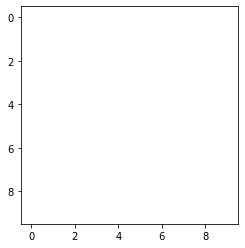

In [9]:
grid = get_grid(10)
draw_array_as_grid("some", grid)